# **Import libraries & load dataset**

In [1]:
!pip install -q scikit-learn joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix)

**Loading dataset**

In [9]:
df = pd.read_csv("Sample_Superstore_Cleaned (1).csv")

In [11]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Featuring**

In [12]:
#Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
#Sipping delay in days
df['ship_delay_days'] = (df['Ship Date']-df['Order Date']).dt.days

#Extract year and month
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month

#Frequency encoding for high-cardinality columns
for col in ['City', 'State', 'Product ID', 'Customer ID']:
  freq = df[col].value_counts().to_dict()
  df[col + '_freq'] = df[col].map(freq).fillna(0).astype(int)

#Classification target
df['is_profitable'] = (df['Profit'] > 0).astype(int)
df[['Sales', 'Quantity', 'Discount', 'Profit', 'is_profitable']].head()

,Sales,Quantity,Discount,Profit,is_profitable
0,261.9600,2,0.00,41.9136,1
1,731.9400,3,0.00,219.5820,1
2,14.6200,2,0.00,6.8714,1
3,957.5775,5,0.45,-383.0310,0
4,22.3680,2,0.20,2.5164,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Discount'].plot(kind='hist', bins=20, title='Discount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Sales', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Discount', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Discount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Discount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Profit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Profit')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Discount'].plot(kind='line', figsize=(8, 4), title='Discount')
plt.gca().spines[['top', 'right']].set_visible(False)

**Feature and preprocessing**

In [17]:
# Feature sets
numeric_features = [
    'Sales','Quantity','Discount','ship_delay_days',
    'City_freq','State_freq','Product ID_freq','Customer ID_freq',
    'order_year','order_month'
]

categorical_features = ['Ship Mode','Segment','Region','Category','Sub-Category']

X = df[numeric_features + categorical_features]
y_reg = df['Profit']
y_clf = df['is_profitable']

# Train-test split
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

# Preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

**Regression Modles**

In [19]:
# Linear Regression
lin_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_reg.fit(X_train, y_reg_train)
y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_reg_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_lin)))
print("R²:", r2_score(y_reg_test, y_pred_lin))

# Random Forest Regressor
rf_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_reg.fit(X_train, y_reg_train)
y_pred_rf = rf_reg.predict(X_test)

print("\nRandom Forest Regressor Results:")
print("MAE:", mean_absolute_error(y_reg_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_rf)))
print("R²:", r2_score(y_reg_test, y_pred_rf))

Linear Regression Results:
MAE: 67.7797395625736
RMSE: 282.39843785203294
R²: -0.6448111961265597

Random Forest Regressor Results:
MAE: 27.145406735117565
RMSE: 224.51424673770094
R²: -0.03963114861574013


**Classification Models**

In [20]:
# Logistic Regression
log_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_clf.fit(X_train, y_clf_train)
y_pred_log = log_clf.predict(X_test)
y_prob_log = log_clf.predict_proba(X_test)[:,1]

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_clf_test, y_pred_log))
print("Precision:", precision_score(y_clf_test, y_pred_log))
print("Recall:", recall_score(y_clf_test, y_pred_log))
print("F1:", f1_score(y_clf_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_clf_test, y_prob_log))

# Random Forest Classifier
rf_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_clf.fit(X_train, y_clf_train)
y_pred_rf_clf = rf_clf.predict(X_test)
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:,1]

print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_clf_test, y_pred_rf_clf))
print("Precision:", precision_score(y_clf_test, y_pred_rf_clf))
print("Recall:", recall_score(y_clf_test, y_pred_rf_clf))
print("F1:", f1_score(y_clf_test, y_pred_rf_clf))
print("ROC AUC:", roc_auc_score(y_clf_test, y_prob_rf_clf))

print("\nConfusion Matrix:\n", confusion_matrix(y_clf_test, y_pred_rf_clf))


Logistic Regression Results:
Accuracy: 0.9389694847423712
Precision: 0.9518072289156626
Recall: 0.9741060419235512
F1: 0.9628275441803779
ROC AUC: 0.9795893336647621

Random Forest Classifier Results:
Accuracy: 0.9464732366183092
Precision: 0.9469026548672567
Recall: 0.9895191122071517
F1: 0.967741935483871
ROC AUC: 0.9817504341825103

Confusion Matrix:
 [[ 287   90]
 [  17 1605]]


**Plot (from random forest regressor)**

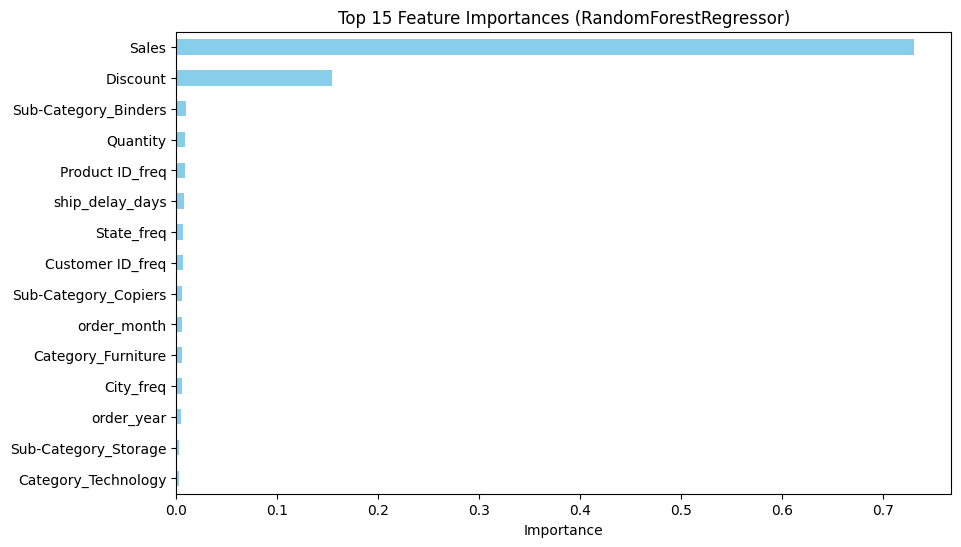

In [21]:
import matplotlib.pyplot as plt

# Get feature importances from RandomForestRegressor
rf_model = rf_reg.named_steps['model']
pre = rf_reg.named_steps['preprocessor']

# Get feature names after preprocessing
ohe = pre.named_transformers_['cat'].named_steps['ohe']
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(cat_names)

importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='barh', color='skyblue')
plt.title("Top 15 Feature Importances (RandomForestRegressor)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

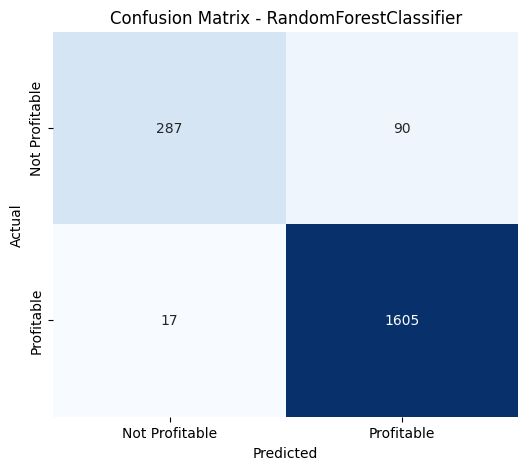

In [22]:
import seaborn as sns

cm = confusion_matrix(y_clf_test, y_pred_rf_clf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Profitable","Profitable"],
            yticklabels=["Not Profitable","Profitable"])
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve**

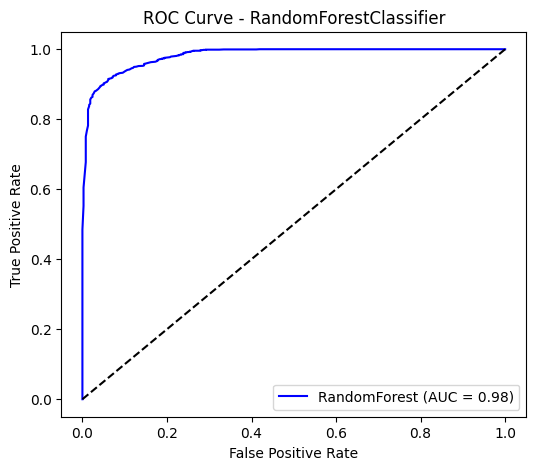

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_clf_test, y_prob_rf_clf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RandomForestClassifier")
plt.legend(loc="lower right")
plt.show()